**Regresión logistica.**

*Breast cancer*

Hello, I'm Go1234550

**Importamos las librerías**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

**Cargamos el conjunto de datos**

Usaremos el dataset de breast_cancer de sklearn.

* Analizaremos las variables que lo conforman para seleccionar los datos con los que trabajaremos.

In [12]:
#Mostrar el dataset
cancer = load_breast_cancer()
#Mostrar las claves del dataset
print(cancer.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
#Mostramos el nombre de las características
print("Nombre de las características: ",cancer.feature_names)

#Mostramos el nombre de las clases
print("Nombre de las clases: ",cancer.target_names)

Nombre de las características:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Nombre de las clases:  ['malignant' 'benign']


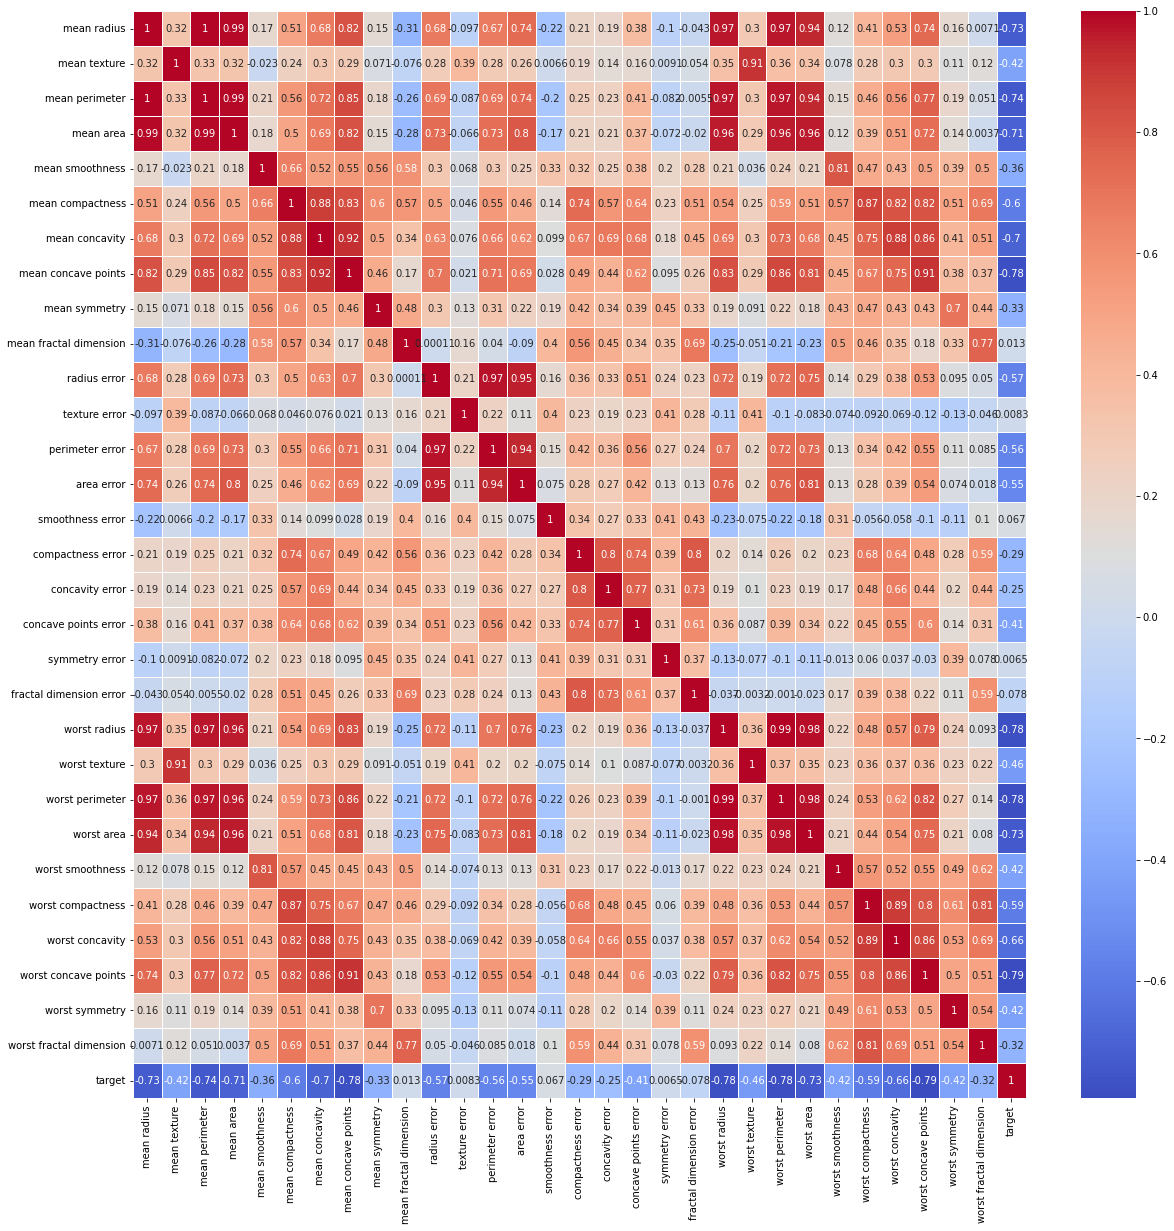

In [14]:
#Creamos un dataframe con las características
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#Añadimos la columna de la clase
df['target'] = cancer.target

#Mostramos la matriz de correlación
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

**Cargamos los datos en nuestras variables**

En este paso cargamos los valores de la variable dependiente y la independiente para nuestra prediccion.

Para este modelo con lo siguiente:

In [15]:
#Asignamos nuestras variables independientes
X = df[[ 'mean area', 'worst area', 'mean perimeter', 'worst perimeter']]

#Asignamos nuestras variables dependientes 
y = cancer.target 


**Creacion de la clase de la regresion logistica**

Haremos uso del gradiente descendente.

In [16]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.losses = []
    #Funcion sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #Funcion de perdida
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    #Entrenamiento del modelo
    def fit(self, X, y):
        # Inicializar los parámetros del modelo
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradiente descendente para actualizar los parámetros
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calcular la pérdida y guardarla para su visualización
            loss = self.loss(y_predicted, y)
            self.losses.append(loss)

            # Calcular gradientes
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Actualizar los parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    #Predicción
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

**Realizamos el split de nuestro conjunto de datos**

* Entrenamiento: 70%
* Prubeas: 30%

In [17]:
from sklearn.model_selection import train_test_split
#Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Realizamos el entrenamiento y prueba del modelo**

Para este proceso, utilizaremos la división del *dateset* mediante kfold para su validación cruzada.

In [18]:
# Número de pliegues para la validación cruzada
num_folds = 5

# Dividir los datos de entrenamiento en pliegues
fold_size = len(X_train) // num_folds
X_folds = [X_train[i*fold_size:(i+1)*fold_size] for i in range(num_folds)]
y_folds = [y_train[i*fold_size:(i+1)*fold_size] for i in range(num_folds)]

# Lista para almacenar los puntajes de precisión de cada pliegue (MSE)
scores = []

# Iterar sobre los pliegues
for i in range(num_folds):
    # Separar el pliegue actual para validación
    X_valid, y_valid = X_folds[i], y_folds[i]
    
    # Crear y entrenar el modelo
    model = LogisticRegression(learning_rate=0.00001, num_iterations=10000)
    model.fit(X_valid, y_valid)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular el MSE del pliegue actual
    mse_fold = np.mean((y_test - y_pred) ** 2)
    
    # Agregar el puntaje del pliegue a la lista de puntajes
    scores.append(mse_fold)

# Calcular de puntaje promedio de MSE
print("Puntaje promedio de MSE:", np.mean(scores))

# Imprimir los puntajes de MSE de cada pliegue
print("Puntajes de MSE de cada pliegue:", scores)

Puntaje promedio de MSE: 0.05730994152046783
Puntajes de MSE de cada pliegue: [0.06432748538011696, 0.05263157894736842, 0.05847953216374269, 0.05847953216374269, 0.05263157894736842]


**Evaluamos el modelo**

Utilizaremos como recurso la matriz de confusión, denotando cada una de sus métricas.

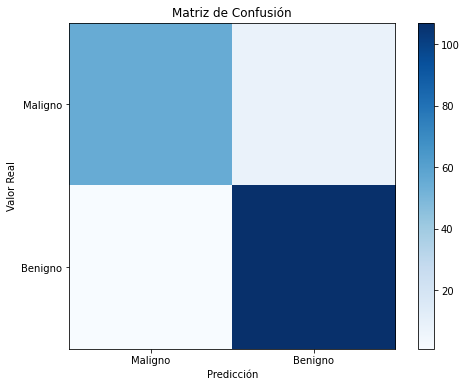

Matriz de confusión: 
[[ 55   8]
 [  1 107]]


In [19]:
#Calcular la precisión del modelo
cm = confusion_matrix(y_test, y_pred)

#Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['Maligno', 'Benigno'])
plt.yticks([0, 1], ['Maligno', 'Benigno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

#Mostramos los valores de la matriz de confusión
print("Matriz de confusión: ")
print(cm)



**Calculamos métricas a partir de la matriz de confusión**

In [20]:
#Mostramos la tasa de verdaderos positivos del modelo o recall
true_positive_rate = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print("Tasa de verdaderos positivos(Recall): ", true_positive_rate)

#Mostramos el accuracy del modelo
accuracy = (cm[1, 1] + cm[0, 0]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy del modelo: ", accuracy)

#Mostramos la precisión del modelo
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precisión del modelo: ", precision)

#Mostramos la especificidad del modelo (tasa de verdaderos negativos)
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Especificidad del modelo: ", specificity)


Tasa de verdaderos positivos(Recall):  0.9907407407407407
Accuracy del modelo:  0.9473684210526315
Precisión del modelo:  0.9304347826086956
Especificidad del modelo:  0.873015873015873
